First 5 rows of dataset:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Missing values per column before cleaning:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Missing values per column after dropping missing rows:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


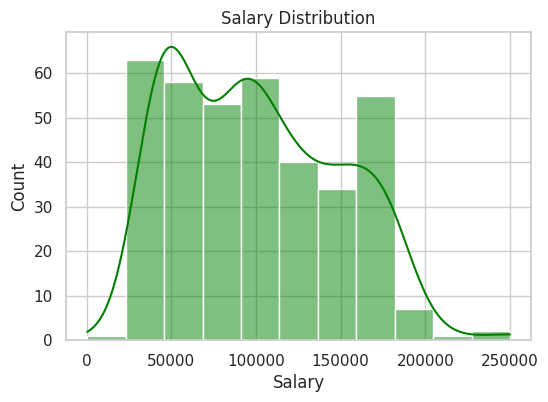


Model Performance:
RMSE: 17772.97
R² Score: 0.87


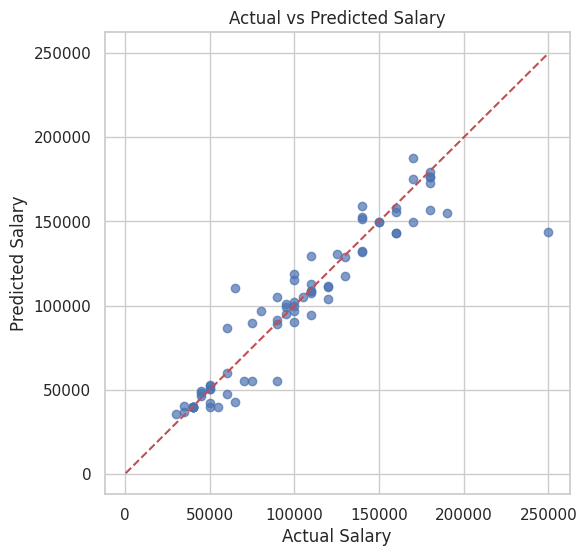


--- Predict salary for a new profile ---
Enter Age: 34
Enter Gender: Male
Enter Education Level: Phd
Enter Job Title: Data Scientist
Enter Years of Experience: 23
Predicted Salary: $99600.00


In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# File ID from your Google Drive link
file_id = '1S3PvhwvdAZpadNZlUGGyJY_811T39G12'
csv_url = f'https://drive.google.com/uc?id={file_id}'

# Load CSV directly from Google Drive link
df = pd.read_csv(csv_url)

# Check first rows
print("First 5 rows of dataset:")
print(df.head())

# Clean data (drop rows with missing values)
print("\nMissing values per column before cleaning:")
print(df.isnull().sum())

df = df.dropna()

print("\nMissing values per column after dropping missing rows:")
print(df.isnull().sum())

# Simple EDA: Salary distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Salary'], kde=True, color='green')
plt.title('Salary Distribution')
plt.show()

# Prepare data
X = df.drop('Salary', axis=1)
y = df['Salary']

categorical_features = ['Gender', 'Education Level', 'Job Title']
numeric_features = ['Age', 'Years of Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Predict salary for a new profile (interactive)
print("\n--- Predict salary for a new profile ---")

def predict_new_salary():
    age = int(input("Enter Age: "))
    gender = input("Enter Gender: ")
    education = input("Enter Education Level: ")
    job_title = input("Enter Job Title: ")
    years_exp = float(input("Enter Years of Experience: "))

    new_person = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Education Level': [education],
        'Job Title': [job_title],
        'Years of Experience': [years_exp]
    })

    predicted_salary = model.predict(new_person)[0]
    print(f"Predicted Salary: ${predicted_salary:.2f}")

predict_new_salary()
